In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
#pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (15,5)

#Viewing Summary()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
raw_data = pd.read_csv('Data/Beer.csv')
raw_data.head()

,Week,Date,PRICE 12PK,PRICE_12PK.Ln,PRICE 18PK,PRICE_18PK.Ln,PRICE 30PK,PRICE_30PK.Ln,CASES 12PK,CASES_12PK.Ln,CASES 18PK,CASES_18PK.Ln,CASES_18PK.Ln.Loglog.model,CASES_18PK.Ln.Loglog.model.Resid,CASES_18PK.Ln.Loglog.real.errors,CASES 30PK,CASES_30PK.Ln
0,1,1/1/2003,19.98,2.99,14.10,2.65,15.19,2.72,223.5,5.4,439.0,6.1,6.088,-0.004,-1.584,55.00,4.01
1,2,1/8/2003,19.98,2.99,18.65,2.93,15.19,2.72,215.0,5.4,98.0,4.6,4.213,0.372,30.452,66.75,4.20
2,3,1/15/2003,19.98,2.99,18.65,2.93,13.87,2.63,227.5,5.4,70.0,4.2,4.213,0.036,2.452,242.00,5.49
3,4,1/22/2003,19.98,2.99,18.65,2.93,12.83,2.55,244.5,5.5,52.0,4.0,4.213,-0.262,-15.548,488.50,6.19
4,5,1/29/2003,19.98,2.99,18.65,2.93,13.16,2.58,313.5,5.7,64.0,4.2,4.213,-0.054,-3.548,308.75,5.73


In [3]:
raw_data.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE_12PK.Ln', 'PRICE 18PK',
       'PRICE_18PK.Ln', 'PRICE 30PK', 'PRICE_30PK.Ln', 'CASES 12PK',
       'CASES_12PK.Ln', 'CASES 18PK', 'CASES_18PK.Ln',
       'CASES_18PK.Ln.Loglog.model', 'CASES_18PK.Ln.Loglog.model.Resid',
       'CASES_18PK.Ln.Loglog.real.errors', 'CASES 30PK', 'CASES_30PK.Ln'],
      dtype='object')

In [5]:
data1 = raw_data.drop(['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln','CASES_12PK.Ln','CASES_18PK.Ln','CASES_18PK.Ln.Loglog.model','CASES_18PK.Ln.Loglog.model.Resid','CASES_18PK.Ln.Loglog.real.errors','CASES_30PK.Ln'], axis=1)

In [7]:
data1.head()

,Week,Date,PRICE 12PK,PRICE 18PK,PRICE 30PK,CASES 12PK,CASES 18PK,CASES 30PK
0,1,1/1/2003,19.98,14.10,15.19,223.5,439.0,55.00
1,2,1/8/2003,19.98,18.65,15.19,215.0,98.0,66.75
2,3,1/15/2003,19.98,18.65,13.87,227.5,70.0,242.00
3,4,1/22/2003,19.98,18.65,12.83,244.5,52.0,488.50
4,5,1/29/2003,19.98,18.65,13.16,313.5,64.0,308.75


In [9]:
data_logged = raw_data.drop(['PRICE 12PK','PRICE 18PK','PRICE 30PK','CASES 12PK','CASES 18PK','CASES 30PK'], axis=1)

In [10]:
data_logged.head()

,Week,Date,PRICE_12PK.Ln,PRICE_18PK.Ln,PRICE_30PK.Ln,CASES_12PK.Ln,CASES_18PK.Ln,CASES_18PK.Ln.Loglog.model,CASES_18PK.Ln.Loglog.model.Resid,CASES_18PK.Ln.Loglog.real.errors,CASES_30PK.Ln
0,1,1/1/2003,2.99,2.65,2.72,5.4,6.1,6.088,-0.004,-1.584,4.01
1,2,1/8/2003,2.99,2.93,2.72,5.4,4.6,4.213,0.372,30.452,4.20
2,3,1/15/2003,2.99,2.93,2.63,5.4,4.2,4.213,0.036,2.452,5.49
3,4,1/22/2003,2.99,2.93,2.55,5.5,4.0,4.213,-0.262,-15.548,6.19
4,5,1/29/2003,2.99,2.93,2.58,5.7,4.2,4.213,-0.054,-3.548,5.73


In [12]:
data1.head()

,Week,Date,PRICE 12PK,PRICE 18PK,PRICE 30PK,CASES 12PK,CASES 18PK,CASES 30PK
0,1,1/1/2003,19.98,14.10,15.19,223.5,439.0,55.00
1,2,1/8/2003,19.98,18.65,15.19,215.0,98.0,66.75
2,3,1/15/2003,19.98,18.65,13.87,227.5,70.0,242.00
3,4,1/22/2003,19.98,18.65,12.83,244.5,52.0,488.50
4,5,1/29/2003,19.98,18.65,13.16,313.5,64.0,308.75


### Data Analysis

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE 12PK', ylabel='Density'>

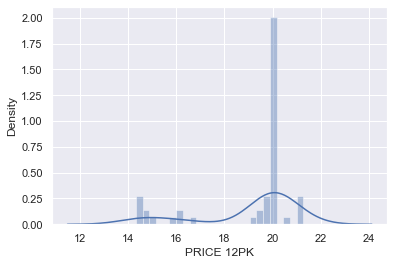

In [13]:
sns.distplot(data1['PRICE 12PK'])

In [14]:
data1.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE 18PK', 'PRICE 30PK', 'CASES 12PK',
       'CASES 18PK', 'CASES 30PK'],
      dtype='object')

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE 18PK', ylabel='Density'>

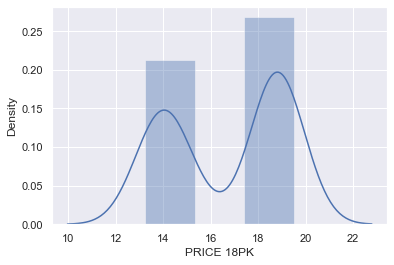

In [15]:
sns.distplot(data1['PRICE 18PK'])

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE 30PK', ylabel='Density'>

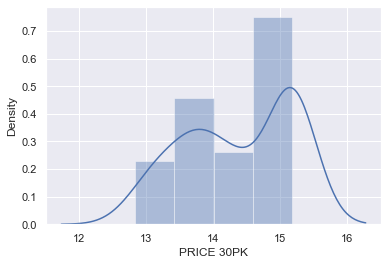

In [16]:
sns.distplot(data1['PRICE 30PK'])

In [18]:
data1.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE 18PK', 'PRICE 30PK', 'CASES 12PK',
       'CASES 18PK', 'CASES 30PK'],
      dtype='object')

In [20]:
data1.head()

,Week,Date,PRICE 12PK,PRICE 18PK,PRICE 30PK,CASES 12PK,CASES 18PK,CASES 30PK
0,1,1/1/2003,19.98,14.10,15.19,223.5,439.0,55.00
1,2,1/8/2003,19.98,18.65,15.19,215.0,98.0,66.75
2,3,1/15/2003,19.98,18.65,13.87,227.5,70.0,242.00
3,4,1/22/2003,19.98,18.65,12.83,244.5,52.0,488.50
4,5,1/29/2003,19.98,18.65,13.16,313.5,64.0,308.75


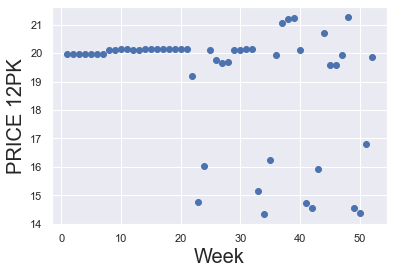

In [19]:
plt.scatter(data1['Week'],data1['PRICE 12PK'])
plt.xlabel('Week', size=20)
plt.ylabel('PRICE 12PK', size=20)
plt.show()

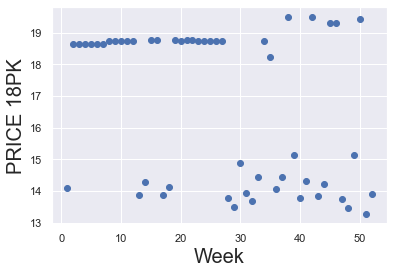

In [21]:
plt.scatter(data1['Week'],data1['PRICE 18PK'])
plt.xlabel('Week', size=20)
plt.ylabel('PRICE 18PK', size=20)
plt.show()

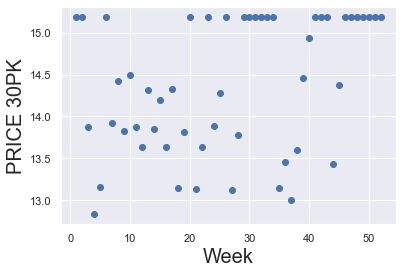

In [22]:
plt.scatter(data1['Week'],data1['PRICE 30PK'])
plt.xlabel('Week', size=20)
plt.ylabel('PRICE 30PK', size=20)
plt.show()

In [23]:
data1.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE 18PK', 'PRICE 30PK', 'CASES 12PK',
       'CASES 18PK', 'CASES 30PK'],
      dtype='object')

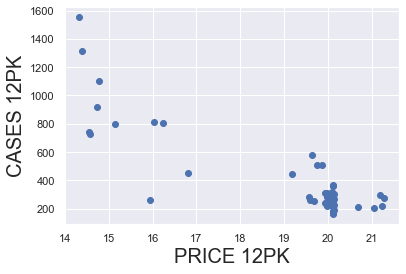

In [25]:
plt.scatter(data1['PRICE 12PK'],data1['CASES 12PK'])
plt.xlabel('PRICE 12PK', size=20)
plt.ylabel('CASES 12PK', size=20)
plt.show()

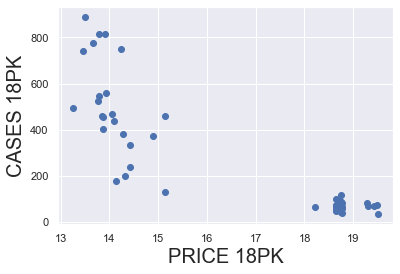

In [26]:
plt.scatter(data1['PRICE 18PK'],data1['CASES 18PK'])
plt.xlabel('PRICE 18PK', size=20)
plt.ylabel('CASES 18PK', size=20)
plt.show()

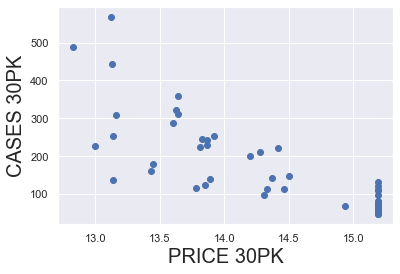

In [27]:
plt.scatter(data1['PRICE 30PK'],data1['CASES 30PK'])
plt.xlabel('PRICE 30PK', size=20)
plt.ylabel('CASES 30PK', size=20)
plt.show()

In [30]:
data_logged.columns

Index(['Week', 'Date', 'PRICE_12PK.Ln', 'PRICE_18PK.Ln', 'PRICE_30PK.Ln',
       'CASES_12PK.Ln', 'CASES_18PK.Ln', 'CASES_18PK.Ln.Loglog.model',
       'CASES_18PK.Ln.Loglog.model.Resid', 'CASES_18PK.Ln.Loglog.real.errors',
       'CASES_30PK.Ln'],
      dtype='object')

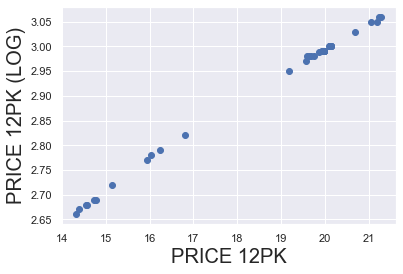

In [33]:
plt.scatter(raw_data['PRICE 12PK'],raw_data['PRICE_12PK.Ln'])
plt.xlabel('PRICE 12PK', size=20)
plt.ylabel('PRICE 12PK (LOG)', size=20)
plt.show()

### CREATING 3 MODEL (6 DIFFERENT MODELS)

##### STANDARD VARIABLES(UNLOGGED)

##### CASE 12PK 

In [34]:
raw_data.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE_12PK.Ln', 'PRICE 18PK',
       'PRICE_18PK.Ln', 'PRICE 30PK', 'PRICE_30PK.Ln', 'CASES 12PK',
       'CASES_12PK.Ln', 'CASES 18PK', 'CASES_18PK.Ln',
       'CASES_18PK.Ln.Loglog.model', 'CASES_18PK.Ln.Loglog.model.Resid',
       'CASES_18PK.Ln.Loglog.real.errors', 'CASES 30PK', 'CASES_30PK.Ln'],
      dtype='object')

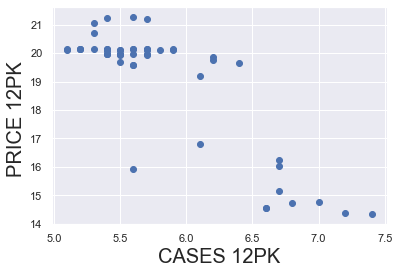

In [37]:
plt.scatter(raw_data['CASES_12PK.Ln'],raw_data['PRICE 12PK'])
plt.xlabel('CASES 12PK', size=20)
plt.ylabel('PRICE 12PK ', size=20)
plt.show()  

In [55]:
data1.columns

Index(['Week', 'Date', 'PRICE 12PK', 'PRICE 18PK', 'PRICE 30PK', 'CASES 12PK',
       'CASES 18PK', 'CASES 30PK'],
      dtype='object')

## Linear Regression

#### CASES 12PK

In [107]:
#Features/Inputs
x1= data1[['PRICE 12PK','PRICE 18PK','PRICE 30PK']]
y1 = data1['CASES 12PK']

In [109]:
x = sm.add_constant(x1)
result = sm.OLS(y1,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 12PK   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     52.98
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           2.91e-15
Time:                        09:55:47   Log-Likelihood:                -332.33
No. Observations:                  52   AIC:                             672.7
Df Residuals:                      48   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2059.0227    608.319      3.385      0.001     835.914    3282.131
PRICE 12PK  -119.8493     11.022    -10.874      0.000    -142.010     -97.689
PRICE 18PK    22.9763      9.188      2.501      0.016       4.503      41.449
PRICE 30PK    16.9354     29.407      0.576      0.567     -42.191      76.062
==============================================================================
Omnibus:                       11.981   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               28.822
Skew:                           0.426   Prob(JB):                     5.51e-07
Kurtosis:                       6.546   Cond. No.                         855.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CASE 12PK(P-VALUE REJECTION)

In [110]:
x2= data1[['PRICE 12PK','PRICE 18PK']]
y2 = data1['CASES 12PK']
x = sm.add_constant(x2)
results = sm.OLS(y2,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 12PK   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     80.40
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.36e-16
Time:                        09:55:59   Log-Likelihood:                -332.51
No. Observations:                  52   AIC:                             671.0
Df Residuals:                      49   BIC:                             676.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2377.7197    250.885      9.477      0.000    1873.548    2881.892
PRICE 12PK  -122.3802     10.039    -12.191      0.000    -142.553    -102.207
PRICE 18PK    21.3697      8.694      2.458      0.018       3.899      38.841
==============================================================================
Omnibus:                       12.703   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               29.940
Skew:                           0.500   Prob(JB):                     3.15e-07
Kurtosis:                       6.581   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
x5w= data1[['PRICE 12PK','PRICE 18PK','Week']]
y4 = data1['CASES 12PK']
x = sm.add_constant(x5w)
result3w = sm.OLS(y4,x).fit()
result3w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 12PK   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     57.46
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           6.48e-16
Time:                        09:56:24   Log-Likelihood:                -330.69
No. Observations:                  52   AIC:                             669.4
Df Residuals:                      48   BIC:                             677.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2003.0376    316.787      6.323      0.000    1366.094    2639.981
PRICE 12PK  -113.6773     10.851    -10.476      0.000    -135.495     -91.860
PRICE 18PK    29.0919      9.441      3.081      0.003      10.110      48.074
Week           2.9967      1.608      1.863      0.069      -0.237       6.230
==============================================================================
Omnibus:                       13.033   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               44.819
Skew:                           0.230   Prob(JB):                     1.85e-10
Kurtosis:                       7.525   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CASES 18PK ( WITHOUT WEEK)

In [113]:
x6= data1[['PRICE 12PK','PRICE 18PK','PRICE 30PK','CASES 12PK','CASES 30PK']]
y6 = data1['CASES 18PK']
x = sm.add_constant(x6)
result4 = sm.OLS(y6,x).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 18PK   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     44.80
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.45e-16
Time:                        09:56:35   Log-Likelihood:                -316.19
No. Observations:                  52   AIC:                             644.4
Df Residuals:                      46   BIC:                             656.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -491.2642    600.530     -0.818      0.418   -1700.069     717.541
PRICE 12PK    57.0009     15.484      3.681      0.001      25.833      88.168
PRICE 18PK   -94.7255      8.799    -10.765      0.000    -112.437     -77.014
PRICE 30PK    77.8274     35.295      2.205      0.032       6.782     148.873
CASES 12PK     0.2232      0.108      2.064      0.045       0.006       0.441
CASES 30PK     0.2180      0.275      0.794      0.431      -0.335       0.771
==============================================================================
Omnibus:                        5.598   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.498
Skew:                           0.652   Prob(JB):                        0.105
Kurtosis:                       3.613   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 18PK (WITH WEEKS)

In [80]:
x7= data1[['PRICE 12PK','PRICE 18PK','PRICE 30PK','CASES 12PK','CASES 30PK','Week']]
y = data1['CASES 18PK']
x = sm.add_constant(x7)
result4 = sm.OLS(y,x).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 18PK   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     43.75
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.55e-17
Time:                        08:39:01   Log-Likelihood:                -312.24
No. Observations:                  52   AIC:                             638.5
Df Residuals:                      45   BIC:                             652.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -533.8298    562.946     -0.948      0.348   -1667.661     600.001
PRICE 12PK    57.1158     14.509      3.936      0.000      27.893      86.339
PRICE 18PK   -84.4338      9.073     -9.306      0.000    -102.708     -66.160
PRICE 30PK    65.1309     33.401      1.950      0.057      -2.143     132.405
CASES 12PK     0.1518      0.105      1.451      0.154      -0.059       0.363
CASES 30PK     0.1660      0.258      0.644      0.523      -0.354       0.686
Week           3.3163      1.220      2.718      0.009       0.859       5.774
==============================================================================
Omnibus:                        4.712   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.608
Skew:                           0.543   Prob(JB):                        0.165
Kurtosis:                       3.697   Cond. No.                     1.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### P-VALUE REJECTIONS

In [122]:
x8= data1[['PRICE 12PK','PRICE 18PK','Week']]
y09 = data1['CASES 18PK']
x = sm.add_constant(x8)
result5 = sm.OLS(y09,x).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 18PK   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     76.49
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           2.65e-18
Time:                        10:04:39   Log-Likelihood:                -316.58
No. Observations:                  52   AIC:                             641.2
Df Residuals:                      48   BIC:                             649.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        821.5257    241.521      3.401      0.001     335.915    1307.136
PRICE 12PK    35.0272      8.273      4.234      0.000      18.393      51.661
PRICE 18PK   -80.4557      7.198    -11.178      0.000     -94.928     -65.984
Week           4.2320      1.226      3.451      0.001       1.767       6.697
==============================================================================
Omnibus:                        5.763   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                6.291
Skew:                           0.355   Prob(JB):                       0.0430
Kurtosis:                       4.549   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CASE 30PK

In [114]:
x9= data1[['PRICE 12PK','PRICE 18PK','PRICE 30PK','CASES 12PK','CASES 18PK','Week']]
y8 = data1['CASES 30PK']
x = sm.add_constant(x9)
result6 = sm.OLS(y8,x).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 30PK   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     25.58
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           5.56e-13
Time:                        09:57:02   Log-Likelihood:                -283.48
No. Observations:                  52   AIC:                             581.0
Df Residuals:                      45   BIC:                             594.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1179.7930    275.742      4.279      0.000     624.419    1735.167
PRICE 12PK     3.8290      9.661      0.396      0.694     -15.628      23.286
PRICE 18PK    23.2690      8.224      2.829      0.007       6.705      39.833
PRICE 30PK  -103.6911     12.706     -8.161      0.000    -129.283     -78.099
CASES 12PK    -0.0112      0.062     -0.182      0.856      -0.135       0.113
CASES 18PK     0.0549      0.085      0.644      0.523      -0.117       0.227
Week           0.1652      0.757      0.218      0.828      -1.359       1.690
==============================================================================
Omnibus:                       25.555   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.825
Skew:                           1.421   Prob(JB):                     2.05e-12
Kurtosis:                       7.095   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 30 (P-VALUE REJECTIONS)

In [115]:
x10= data1[['PRICE 18PK','PRICE 30PK']]
y9 = data1['CASES 30PK']
x = sm.add_constant(x10)
result7 = sm.OLS(y9,x).fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASES 30PK   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     77.22
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           7.13e-16
Time:                        09:57:21   Log-Likelihood:                -285.05
No. Observations:                  52   AIC:                             576.1
Df Residuals:                      49   BIC:                             582.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1422.6839    179.635      7.920      0.000    1061.695    1783.673
PRICE 18PK    16.8661      3.594      4.693      0.000       9.644      24.089
PRICE 30PK  -107.0794     10.754     -9.957      0.000    -128.690     -85.468
==============================================================================
Omnibus:                       21.349   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.332
Skew:                           1.196   Prob(JB):                     1.06e-09
Kurtosis:                       6.655   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LOGGED DATA

In [90]:
data_logged.head()

,Week,Date,PRICE_12PK.Ln,PRICE_18PK.Ln,PRICE_30PK.Ln,CASES_12PK.Ln,CASES_18PK.Ln,CASES_18PK.Ln.Loglog.model,CASES_18PK.Ln.Loglog.model.Resid,CASES_18PK.Ln.Loglog.real.errors,CASES_30PK.Ln
0,1,1/1/2003,2.99,2.65,2.72,5.4,6.1,6.088,-0.004,-1.584,4.01
1,2,1/8/2003,2.99,2.93,2.72,5.4,4.6,4.213,0.372,30.452,4.20
2,3,1/15/2003,2.99,2.93,2.63,5.4,4.2,4.213,0.036,2.452,5.49
3,4,1/22/2003,2.99,2.93,2.55,5.5,4.0,4.213,-0.262,-15.548,6.19
4,5,1/29/2003,2.99,2.93,2.58,5.7,4.2,4.213,-0.054,-3.548,5.73


In [91]:
data_logged.columns

Index(['Week', 'Date', 'PRICE_12PK.Ln', 'PRICE_18PK.Ln', 'PRICE_30PK.Ln',
       'CASES_12PK.Ln', 'CASES_18PK.Ln', 'CASES_18PK.Ln.Loglog.model',
       'CASES_18PK.Ln.Loglog.model.Resid', 'CASES_18PK.Ln.Loglog.real.errors',
       'CASES_30PK.Ln'],
      dtype='object')

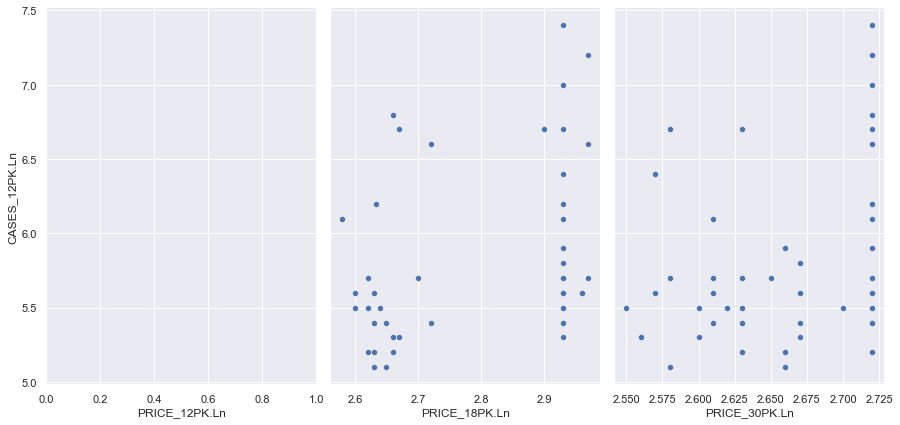

In [93]:
sns.pairplot(data_logged, x_vars=['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln'],y_vars=['CASES_12PK.Ln'], height=6, aspect=0.7)

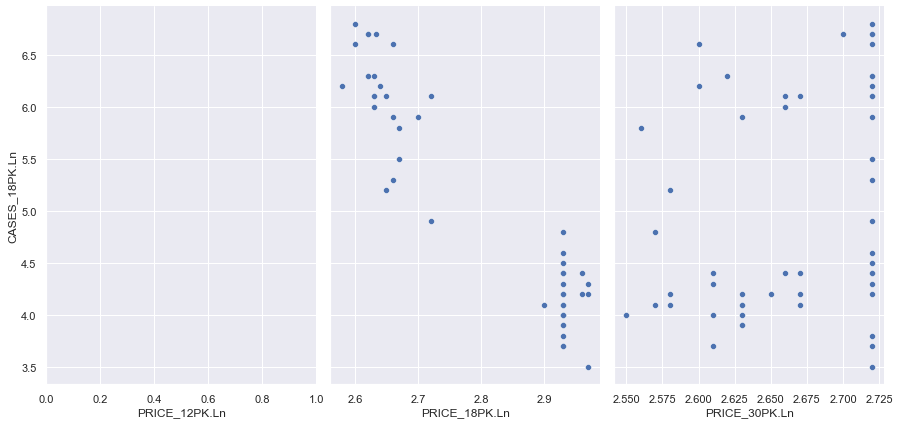

In [94]:
sns.pairplot(data_logged, x_vars=['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln'],y_vars=['CASES_18PK.Ln'], height=6, aspect=0.7)

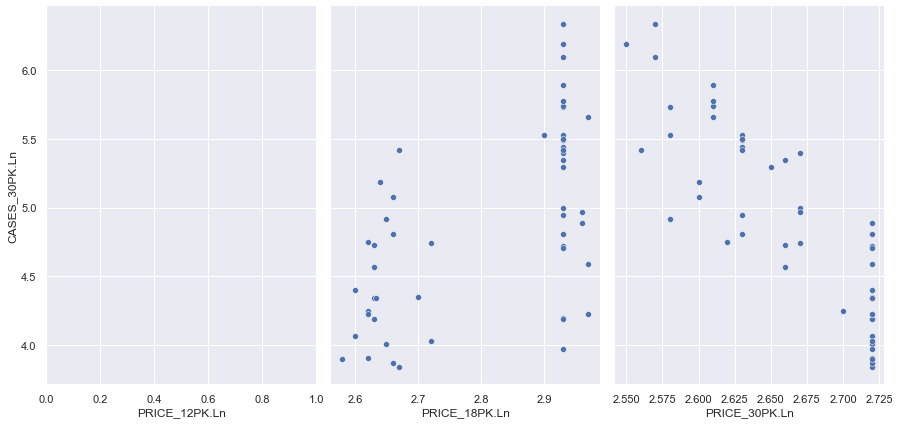

In [95]:
sns.pairplot(data_logged, x_vars=['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln'],y_vars=['CASES_30PK.Ln'], height=6, aspect=0.7)

In [96]:
data_logged.columns

Index(['Week', 'Date', 'PRICE_12PK.Ln', 'PRICE_18PK.Ln', 'PRICE_30PK.Ln',
       'CASES_12PK.Ln', 'CASES_18PK.Ln', 'CASES_18PK.Ln.Loglog.model',
       'CASES_18PK.Ln.Loglog.model.Resid', 'CASES_18PK.Ln.Loglog.real.errors',
       'CASES_30PK.Ln'],
      dtype='object')

### CASE 12 (LOGGED)

In [116]:
x11= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln','CASES_18PK.Ln','CASES_30PK.Ln','Week']]
y11 = data_logged['CASES_12PK.Ln']
x = sm.add_constant(x11)
result11 = sm.OLS(y11,x).fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_12PK.Ln   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     35.27
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.94e-15
Time:                        09:57:39   Log-Likelihood:                 1.2951
No. Observations:                  52   AIC:                             11.41
Df Residuals:                      45   BIC:                             25.07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5423      4.481      1.683      0.099      -1.482      16.567
PRICE_12PK.Ln    -4.3895      0.595     -7.381      0.000      -5.587      -3.192
PRICE_18PK.Ln     2.8006      1.023      2.736      0.009       0.739       4.862
PRICE_30PK.Ln     0.4349      1.777      0.245      0.808      -3.144       4.013
CASES_18PK.Ln     0.3022      0.153      1.976      0.054      -0.006       0.610
CASES_30PK.Ln     0.1003      0.195      0.513      0.610      -0.293       0.494
Week              0.0055      0.003      1.644      0.107      -0.001       0.012
==============================================================================
Omnibus:                        9.851   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.013
Skew:                          -0.725   Prob(JB):                      0.00406
Kurtosis:                       4.727   Cond. No.                     4.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 12 (LOGGED)(P-VALUE REJECTIONS)

In [117]:
x12= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln']]
y12 = data_logged['CASES_12PK.Ln']
x = sm.add_constant(x12)
result12 = sm.OLS(y12,x).fit()
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_12PK.Ln   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     80.95
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           2.95e-16
Time:                        09:57:55   Log-Likelihood:                -6.0217
No. Observations:                  52   AIC:                             18.04
Df Residuals:                      49   BIC:                             23.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2823      1.278     11.960      0.000      12.714      17.850
PRICE_12PK.Ln    -3.9968      0.332    -12.045      0.000      -4.664      -3.330
PRICE_18PK.Ln     0.8099      0.265      3.054      0.004       0.277       1.343
==============================================================================
Omnibus:                        1.958   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.109
Skew:                           0.234   Prob(JB):                        0.574
Kurtosis:                       3.542   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CASES 18

In [118]:
x13= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln','CASES_12PK.Ln','CASES_30PK.Ln','Week']]
y13 = data_logged['CASES_18PK.Ln']
x = sm.add_constant(x13)
result13 = sm.OLS(y13,x).fit()
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_18PK.Ln   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.23e-28
Time:                        09:58:14   Log-Likelihood:                 4.7918
No. Observations:                  52   AIC:                             4.416
Df Residuals:                      45   BIC:                             18.08
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4285      4.212      1.526      0.134      -2.054      14.911
PRICE_12PK.Ln     3.4749      0.644      5.393      0.000       2.177       4.773
PRICE_18PK.Ln    -6.1314      0.482    -12.712      0.000      -7.103      -5.160
PRICE_30PK.Ln     1.5385      1.646      0.934      0.355      -1.778       4.855
CASES_12PK.Ln     0.2641      0.134      1.976      0.054      -0.005       0.533
CASES_30PK.Ln    -0.0556      0.183     -0.304      0.763      -0.424       0.313
Week              0.0081      0.003      2.729      0.009       0.002       0.014
==============================================================================
Omnibus:                        0.989   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.339
Skew:                           0.038   Prob(JB):                        0.844
Kurtosis:                       3.388   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 18 (P-VALUE REJECTIONS)

In [119]:
x14= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln','Week']]
y14 = data_logged['CASES_18PK.Ln']
x = sm.add_constant(x14)
result14 = sm.OLS(y14,x).fit()
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_18PK.Ln   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     258.9
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.25e-29
Time:                        09:58:25   Log-Likelihood:                -1.9711
No. Observations:                  52   AIC:                             11.94
Df Residuals:                      48   BIC:                             19.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.5232      1.474     10.534      0.000      12.560      18.486
PRICE_12PK.Ln     2.1450      0.344      6.241      0.000       1.454       2.836
PRICE_18PK.Ln    -6.1002      0.278    -21.974      0.000      -6.658      -5.542
Week              0.0114      0.003      3.936      0.000       0.006       0.017
==============================================================================
Omnibus:                        4.010   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.101
Skew:                          -0.389   Prob(JB):                        0.212
Kurtosis:                       3.909   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 30PK

In [120]:
x15= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln','CASES_12PK.Ln','CASES_18PK.Ln','Week']]
y15 = data_logged['CASES_30PK.Ln']
x = sm.add_constant(x15)
result15 = sm.OLS(y15,x).fit()
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_30PK.Ln   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     98.11
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.58e-24
Time:                        09:58:39   Log-Likelihood:                 15.533
No. Observations:                  52   AIC:                            -17.07
Df Residuals:                      45   BIC:                            -3.408
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.0704      2.570      6.254      0.000      10.895      21.246
PRICE_12PK.Ln     1.7558      0.619      2.835      0.007       0.508       3.003
PRICE_18PK.Ln     1.8104      0.796      2.274      0.028       0.207       3.414
PRICE_30PK.Ln    -8.1403      0.596    -13.652      0.000      -9.341      -6.939
CASES_12PK.Ln     0.0580      0.113      0.513      0.610      -0.170       0.286
CASES_18PK.Ln    -0.0368      0.121     -0.304      0.763      -0.281       0.207
Week              0.0035      0.003      1.361      0.180      -0.002       0.009
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.296
Skew:                           0.075   Prob(JB):                        0.523
Kurtosis:                       3.759   Cond. No.                     3.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CASE 30 (P-VALUE REJECTIONS)

In [121]:
x16= data_logged[['PRICE_12PK.Ln','PRICE_18PK.Ln','PRICE_30PK.Ln']]
y16 = data_logged['CASES_30PK.Ln']
x = sm.add_constant(x16)
result16 = sm.OLS(y16,x).fit()
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CASES_30PK.Ln   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           7.24e-27
Time:                        09:58:54   Log-Likelihood:                 13.802
No. Observations:                  52   AIC:                            -19.60
Df Residuals:                      48   BIC:                            -11.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.0631      2.093      8.151      0.000      12.854      21.272
PRICE_12PK.Ln     1.3011      0.250      5.201      0.000       0.798       1.804
PRICE_18PK.Ln     1.9572      0.192     10.181      0.000       1.571       2.344
PRICE_30PK.Ln    -8.0740      0.540    -14.962      0.000      -9.159      -6.989
==============================================================================
Omnibus:                        2.484   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.712
Skew:                          -0.147   Prob(JB):                        0.425
Kurtosis:                       3.839   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""